In [1]:
import matplotlib.pyplot as plot
# from demo import *
import pandas as pd
# from ilp import ilp
from sample import *
# import time

# Read a dataset of 1M size, while filtering out data point with wrong formats

In [2]:
# plt_files=[]
import os
# threshold=1e6
plt=[]
for dir,_,plt_files in os.walk('data/Data/'):
    plt+=[os.path.join(dir,file) for file in plt_files]
threshold=1e6
df=pd.read_csv(plt[0],sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
point_set_size=point_set.shape[0]
for file in plt[1:]:
    df=pd.read_csv(file,sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
    df_points=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
    if df_points.shape==(0,):
        continue
    point_set=np.concatenate((point_set,df_points))
    point_set_size+=df_points.shape[0]
    if point_set_size>threshold:
        break
print(point_set_size)

1002131


## Transform the format of raw data

In [8]:
valid_points=[]
for i in point_set:
    float_i=i.astype(float)
    valid_points.append(float_i)
valid_points=np.array(valid_points)
valid_points.shape

(1001183, 2)

# Interchange

In [9]:
# Permutate dataset randomly to before running Interchange
np.random.seed(0)
new=np.random.permutation(valid_points)

In [4]:
prox=proximity(valid_points,set_eps=False)
prox.epsilon

3.797682913998397e-07

In [10]:
# Record the running process of Interchange
int_generator=interchange_timer(prox)
int_samples=int_generator.run(new[:int(1e6)],1000,3,12) 
print(int_samples.shape)

1000000
Sat Apr 16 13:07:23 2022
624 624
save 1th file
Sat Apr 16 13:07:26 2022
914 914
save 2th file
Sat Apr 16 13:07:29 2022
1067 1000
save 3th file
Sat Apr 16 13:07:32 2022
1175 1000
save 4th file
Sat Apr 16 13:07:35 2022
1289 1000
save 5th file
Sat Apr 16 13:07:38 2022
1396 1000
save 6th file
Sat Apr 16 13:07:41 2022
1510 1000
save 7th file
Sat Apr 16 13:07:44 2022
1614 1000
save 8th file
Sat Apr 16 13:07:47 2022
1730 1000
save 9th file
Sat Apr 16 13:07:50 2022
1839 1000
save 10th file
Sat Apr 16 13:07:53 2022
1946 1000
save 11th file
Sat Apr 16 13:07:56 2022
2055 1000
save 12th file
(1000, 2)


In [11]:
points=np.load('stop_points/int_1000000_3_3_1000.npy')
print(get_obj(points,prox),points.shape)

438.79 (1000, 2)


# Reservoir Sampling

In [12]:
start=time.time()
rd_sample=ReservoirSample(valid_points[:int(1e6)],1000)
print(time.time()-start)
print(get_obj(rd_sample,prox))
# rd_x=rd_sample[:,0]
# rd_y=rd_sample[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)
# plot.scatter(rd_x,rd_y,c='b')

1.5478756427764893
864.63


# Stratified Sampling

In [16]:
start=time.time()
st=Stratified_sampling(valid_points[:int(1e6)],1000)
print(time.time()-start)
print(get_obj(st,prox))

1.5353245735168457
778.53


In [13]:
# Read and get the objective values from Interchange records
obj=[]
for i in range(12):
    points=np.load('stop_points/int_1000000_3_{}_1000.npy'.format(i+1))
    x=points[:,0]
    y=points[:,1]
    obj.append(get_obj(points,prox))    
    print('int_1000000_3_{}_1000.npy'.format(i+1))
obj

[405.9, 821.35, 438.79, 113.99, 25.54, 3.83, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]

In [17]:
int_generator=interchange_timer(prox)
int_samples=int_generator.run(new[:int(1e6)],800,3,12)
print(int_samples.shape)

1000000
Sat Apr 16 13:22:28 2022
626 626
save 1th file
Sat Apr 16 13:22:31 2022
845 800
save 2th file
Sat Apr 16 13:22:34 2022
983 800
save 3th file
Sat Apr 16 13:22:37 2022
1108 800
save 4th file
Sat Apr 16 13:22:40 2022
1235 800
save 5th file
Sat Apr 16 13:22:43 2022
1369 800
save 6th file
Sat Apr 16 13:22:46 2022
1510 800
save 7th file
Sat Apr 16 13:22:49 2022
1647 800
save 8th file
Sat Apr 16 13:22:52 2022
1781 800
save 9th file
Sat Apr 16 13:22:55 2022
1915 800
save 10th file
Sat Apr 16 13:22:58 2022
2053 800
save 11th file
Sat Apr 16 13:23:01 2022
2190 800
save 12th file
(800, 2)


In [19]:
obj_800=[]
for i in range(12):
    points=np.load('stop_points/int_1000000_3_{}_800.npy'.format(i+1))
    x=points[:,0]
    y=points[:,1]
    obj_800.append(get_obj(points,prox))    
    print('int_1000000_3_{}_800.npy'.format(i+1))
obj_800

int_1000000_3_1_800.npy
int_1000000_3_2_800.npy
int_1000000_3_3_800.npy
int_1000000_3_4_800.npy
int_1000000_3_5_800.npy
int_1000000_3_6_800.npy
int_1000000_3_7_800.npy
int_1000000_3_8_800.npy
int_1000000_3_9_800.npy
int_1000000_3_10_800.npy
int_1000000_3_11_800.npy
int_1000000_3_12_800.npy


[405.9, 318.41, 34.22, 0.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

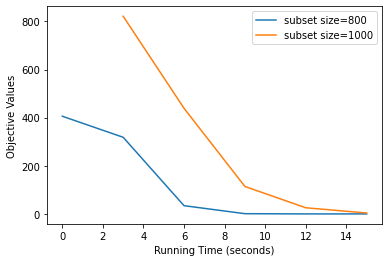

In [31]:
x_800=[i*3 for i in range(6)]
y_800=obj_800[:6]
x_1000=[i*3 for i in range(1,6)]
y_1000=obj[1:6]
# plot.plot(x,y)
plot.plot(x_800, y_800, label = "subset size=800")
plot.plot(x_1000, y_1000, label = "subset size=1000")
plot.xlabel('Running Time (seconds)')
plot.ylabel('Objective Values')
plot.legend()
plot.show()